In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def is_spam(x):
    if x.find('I am Victoriya') != -1:
        return True
    if x.find('seach for boy-friend') != -1:
        return True
    if x.find('Ny photos') != -1:
        return True
    
    return False

In [3]:
is_spam('I am Victoriya, I am 27 y.o.')

True

In [4]:
st = 'a bc def'
st.find('abc')

-1

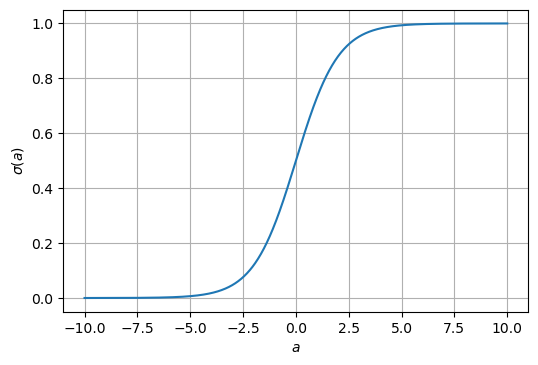

In [5]:
fig, ax = plt.subplots(dpi=100)
x = np.linspace(-10, 10, 1000)
ax.plot(x, 1 / (1+np.exp(-x)))
ax.set_xlabel('$a$')
ax.set_ylabel('$\sigma(a)$')
ax.grid()
plt.show()

In [7]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [8]:
sigmoid(0)

0.5

In [9]:
sigmoid(3), sigmoid(-3)

(0.9525741268224334, 0.04742587317756678)

In [12]:
sigmoid(-1000.)

/var/folders/31/34b84x3d0pq7msq7m4v_8v7r0000gn/T/ipykernel_77490/2796829206.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


0.0

In [13]:
def sigmoid(a):
    if 0 <= a:
        return 1 / (1+np.exp(-1))
    else:
        return 1. - 1 / (1+np.exp(a))

In [14]:
sigmoid(-10000.)

0.0